In [262]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Lade den Datensatz
df = pd.read_csv('C:/Users\heppl/DS Projehtarbeit/Data/day.csv')

# "instant" Spalte löschen
df.drop(columns=["instant"], inplace=True)

# Ersetze die Zahlen in 'season' durch die entsprechenden Wörter
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Ersetze die Zahlen in 'weathersit' durch die entsprechenden Wetterkategorien
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Few Clouds', 3: 'Partly Cloudy'}) # in der Variablenbeschreibung des Datensatzes wird 3 doppelt geführt. max ist 3

# Spalten umbenennen
df = df.rename(columns={'dteday': 'date', 'mnth': 'month', 'cnt': 'distribution', 'hr': 'hour', 'yr': 'year'})

# Zeige die ersten Zeilen des Datensatzes
print(df.head())



         date  season  year  month  holiday  weekday  workingday  weathersit  \
0  2011-01-01  Winter     0      1        0        6           0  Few Clouds   
1  2011-01-02  Winter     0      1        0        0           0  Few Clouds   
2  2011-01-03  Winter     0      1        0        1           1       Clear   
3  2011-01-04  Winter     0      1        0        2           1       Clear   
4  2011-01-05  Winter     0      1        0        3           1       Clear   

       temp     atemp       hum  windspeed  casual  registered  distribution  
0  0.344167  0.363625  0.805833   0.160446     331         654           985  
1  0.363478  0.353739  0.696087   0.248539     131         670           801  
2  0.196364  0.189405  0.437273   0.248309     120        1229          1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454          1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518          1600  


In [263]:
# Zeige die grundlegenden Informationen zum Datensatz
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          731 non-null    object 
 1   season        731 non-null    object 
 2   year          731 non-null    int64  
 3   month         731 non-null    int64  
 4   holiday       731 non-null    int64  
 5   weekday       731 non-null    int64  
 6   workingday    731 non-null    int64  
 7   weathersit    731 non-null    object 
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  windspeed     731 non-null    float64
 12  casual        731 non-null    int64  
 13  registered    731 non-null    int64  
 14  distribution  731 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 85.8+ KB
None


In [264]:
# Statistiken der numerischen Spalten anzeigen
print(df.describe())

             year       month     holiday     weekday  workingday        temp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.500684    6.519836    0.028728    2.997264    0.683995    0.495385   
std      0.500342    3.451913    0.167155    2.004787    0.465233    0.183051   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.059130   
25%      0.000000    4.000000    0.000000    1.000000    0.000000    0.337083   
50%      1.000000    7.000000    0.000000    3.000000    1.000000    0.498333   
75%      1.000000   10.000000    0.000000    5.000000    1.000000    0.655417   
max      1.000000   12.000000    1.000000    6.000000    1.000000    0.861667   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
std      0.162961    0.142429    0.077498   686.622488  1

In [265]:
# Fehlende Werte prüfen
print(df.isnull().sum())
df = df.dropna()

date            0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
distribution    0
dtype: int64


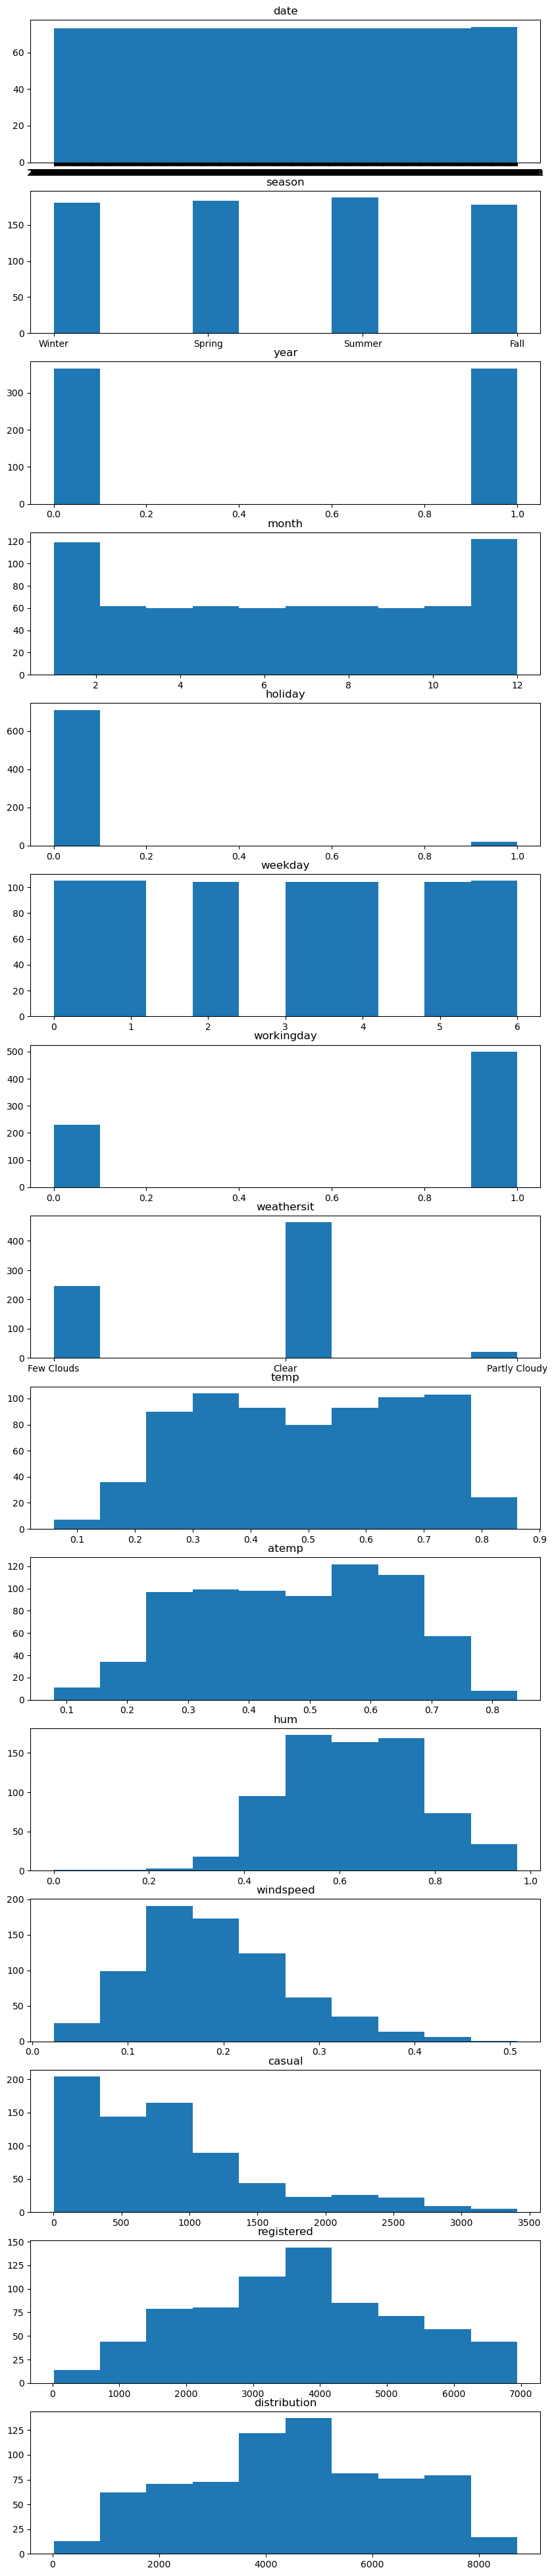

In [266]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(10, 50))
for i, column in enumerate(df.columns):
    ax[i].hist(df[column])
    ax[i].set_title(column)

Datenverteilung der Zielvariablen Distribution (Nachfrage)

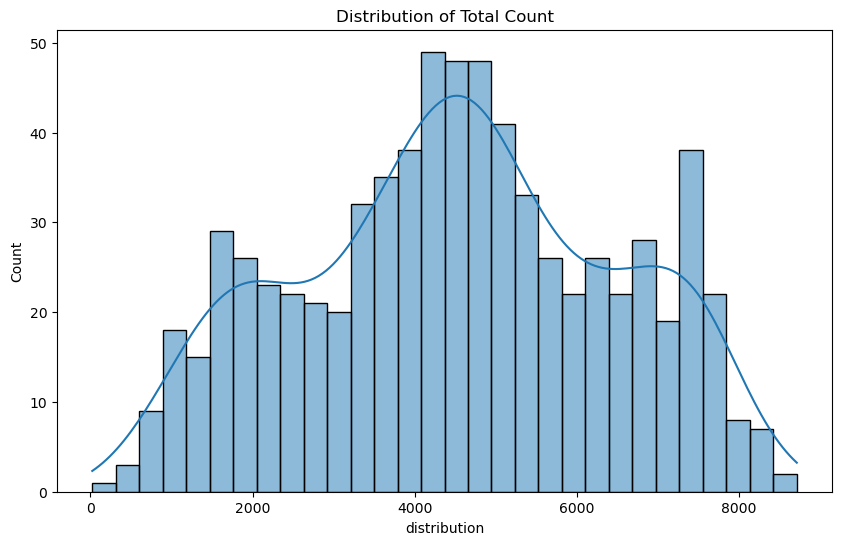

In [267]:
# Datenverteilung der Zielvariablen Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['distribution'], bins=30, kde=True)
plt.title('Distribution of Total Count')
plt.show()

Trends und Aufteilung der Nachfrage

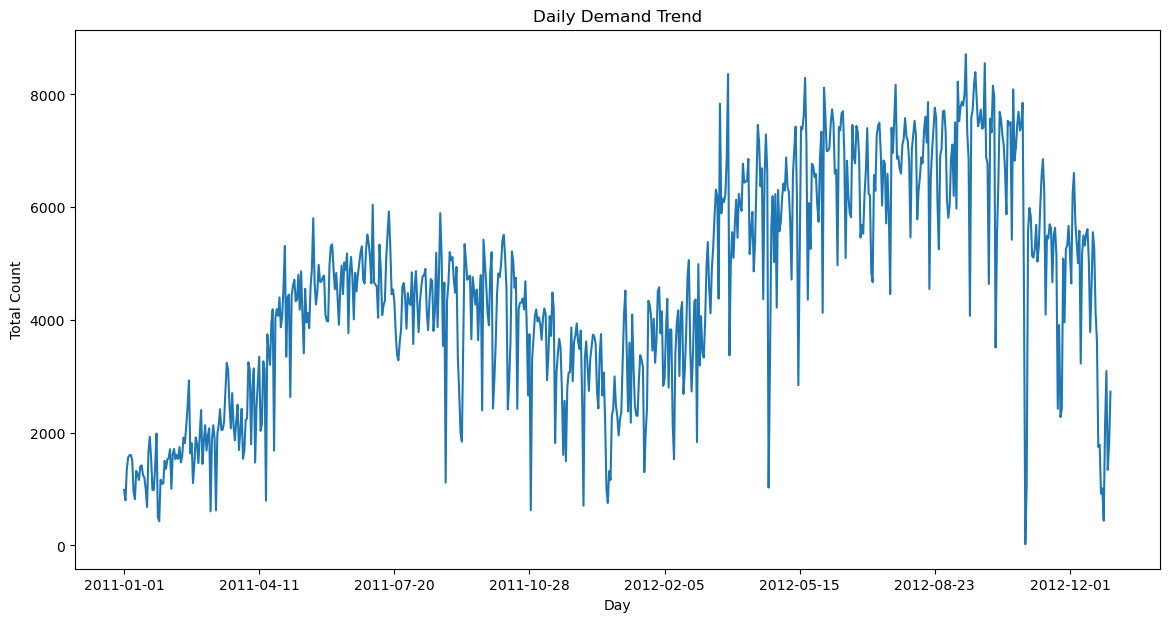

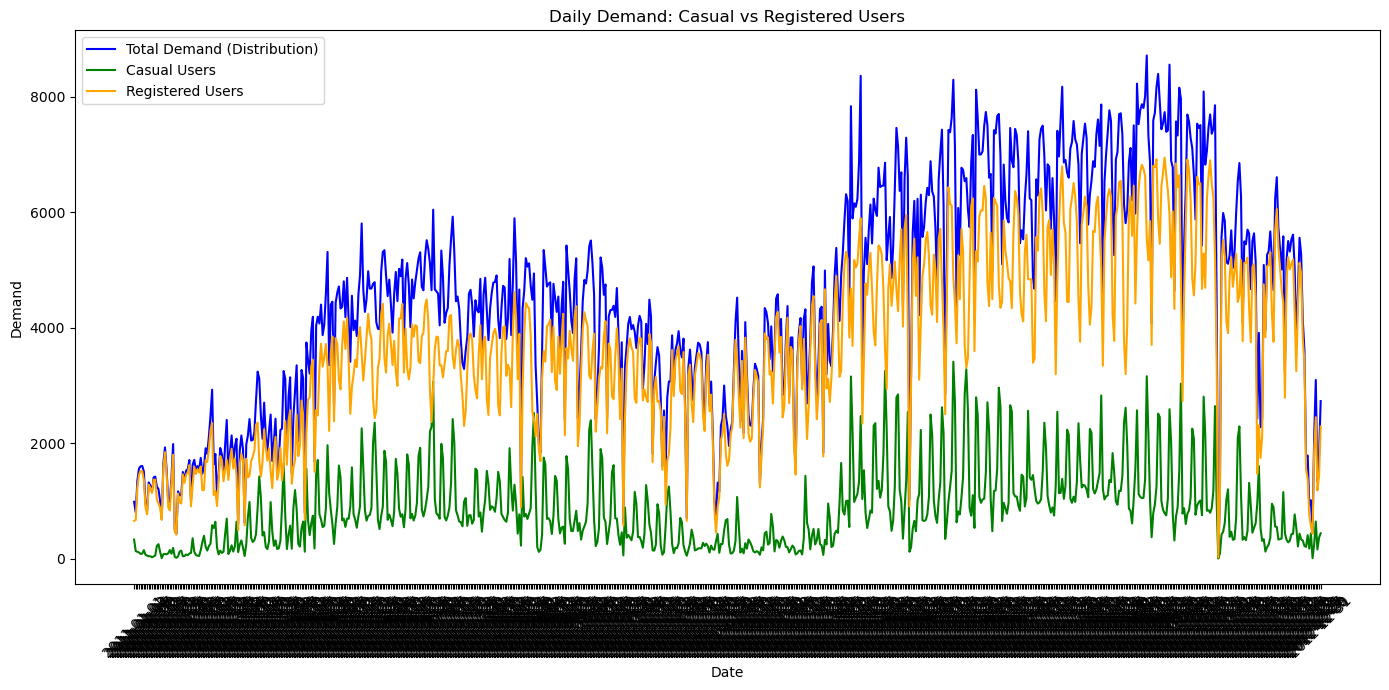

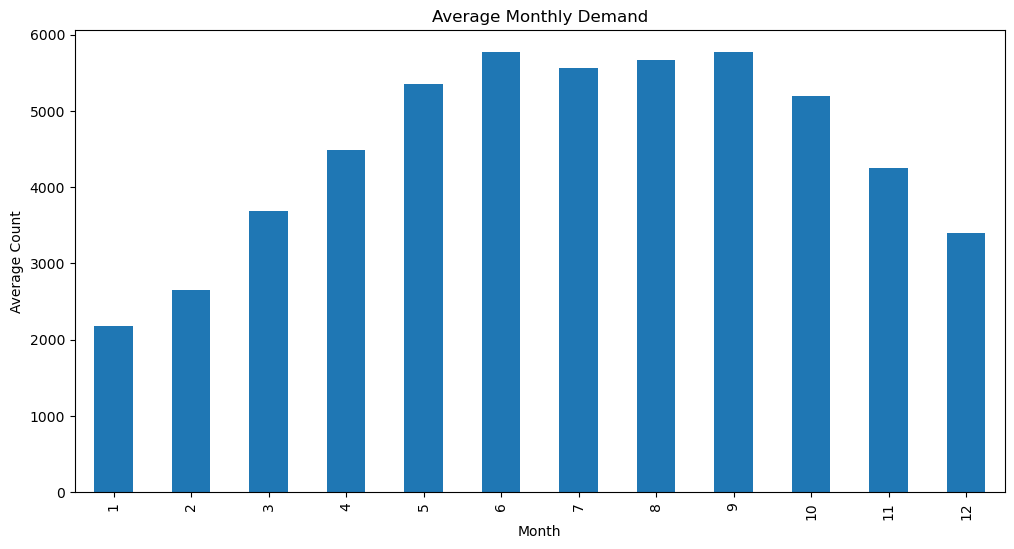

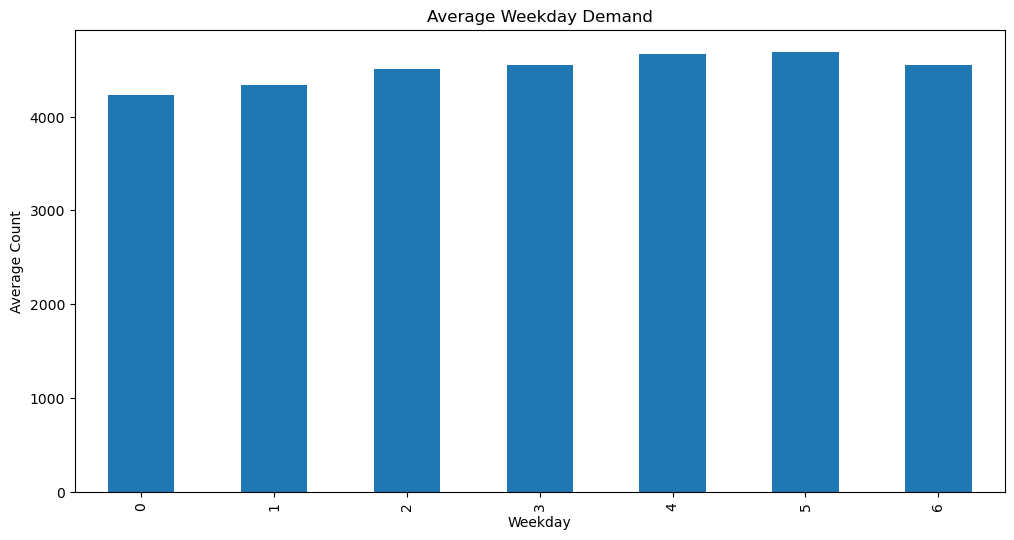

In [268]:
# Trend über die Zeit
plt.figure(figsize=(14, 7))
df.groupby('date')['distribution'].mean().plot()
plt.title('Daily Demand Trend')
plt.xlabel('Day')
plt.ylabel('Total Count')
plt.show()

# Erstelle eine neue Figur und Achsen
plt.figure(figsize=(14, 7))

# Plot der täglichen Gesamtnachfrage (distribution)
plt.plot(df['date'], df['distribution'], label='Total Demand (Distribution)', color='blue')

# Plot der casual Nachfrage
plt.plot(df['date'], df['casual'], label='Casual Users', color='green')

# Plot der registered Nachfrage
plt.plot(df['date'], df['registered'], label='Registered Users', color='orange')

# Hinzufügen von Titel und Labels
plt.title('Daily Demand: Casual vs Registered Users')
plt.xlabel('Date')
plt.ylabel('Demand')

# Anzeige der Legende
plt.legend()

# Rotation der x-Achse für bessere Lesbarkeit der Datumswerte
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Durchschnittliche monatliche Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('month')['distribution'].mean().plot(kind='bar')
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()

# Durchschnittliche Wochentags-Nachfrage 
plt.figure(figsize=(12, 6))
df.groupby('weekday')['distribution'].mean().plot(kind='bar')
plt.title('Average Weekday Demand')
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.show()

Untersuchung von Ausreißern

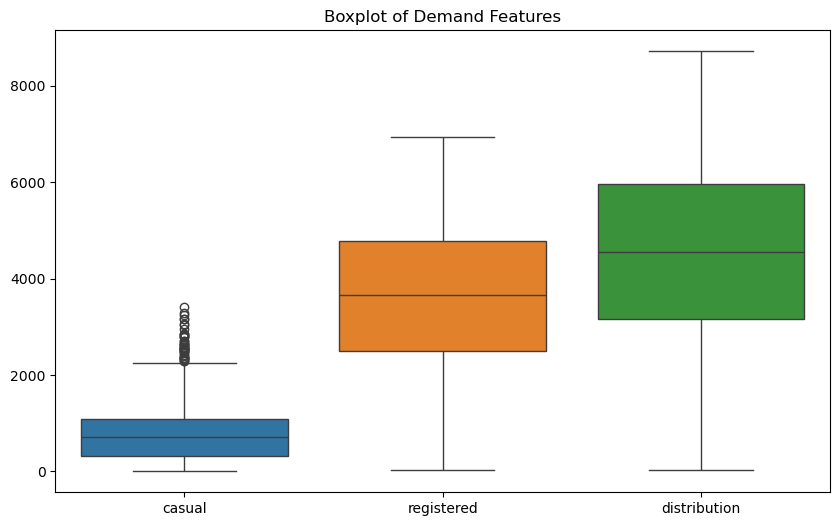

In [269]:
# Boxplot für die Features casual, registered und distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['casual', 'registered', 'distribution']])
plt.title('Boxplot of Demand Features')
plt.show()


In [270]:
# Berechnung Mittelwert und Standardabweichung
mean_distribution = df['casual'].mean()
std_distribution = df['casual'].std()

# Definieren eines Schwellenwertes für Ausreißer (x * Standardabweichungen)
threshold = 3
outliers = df[(df['casual'] > mean_distribution + threshold * std_distribution) | 
              (df['casual'] < mean_distribution - threshold * std_distribution)]

# Ausgabe der Ausreißer
print(f'Anzahl der Ausreißer: {len(outliers)}')
outliers[['date', 'casual']]


Anzahl der Ausreißer: 8


,date,casual
184,2011-07-04,3065
441,2012-03-17,3155
462,2012-04-07,3252
504,2012-05-19,3410
512,2012-05-27,3283
532,2012-06-16,2963
623,2012-09-15,3160
644,2012-10-06,3031


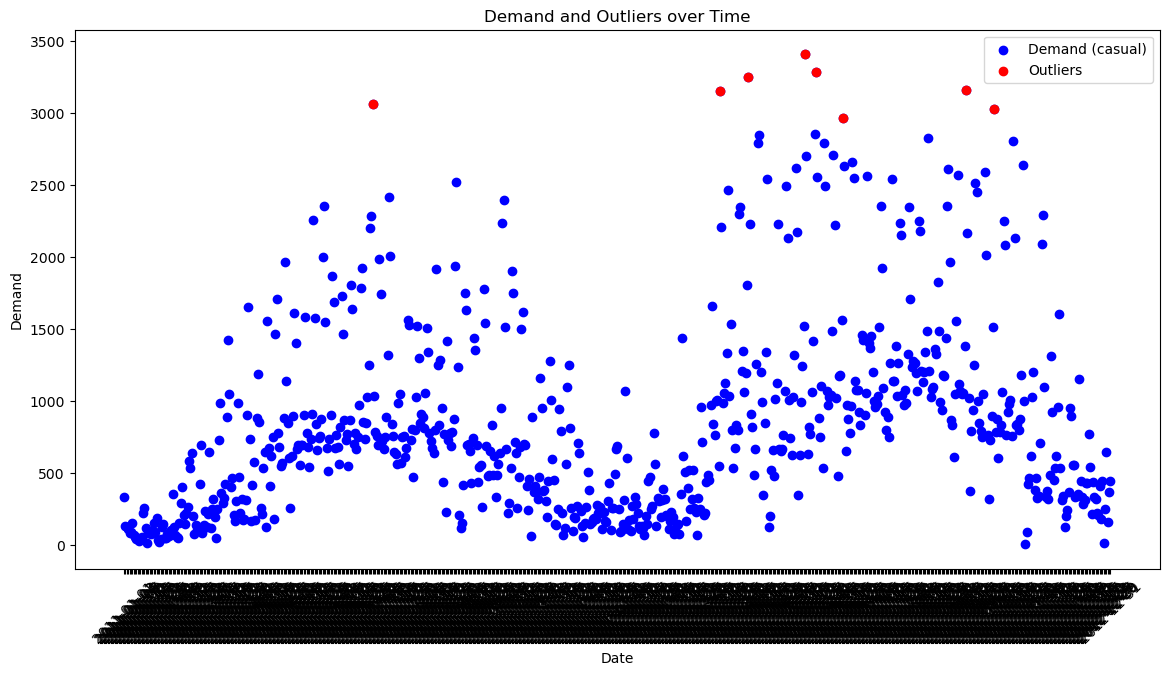

In [271]:
plt.figure(figsize=(14, 7))
plt.scatter(df['date'], df['casual'], label='Demand (casual)', color='blue')
plt.scatter(outliers['date'], outliers['casual'], color='red', label='Outliers')
plt.title('Demand and Outliers over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Untersuchung von Zusammenhang zwischen den Features und der Nachfrage (Target)

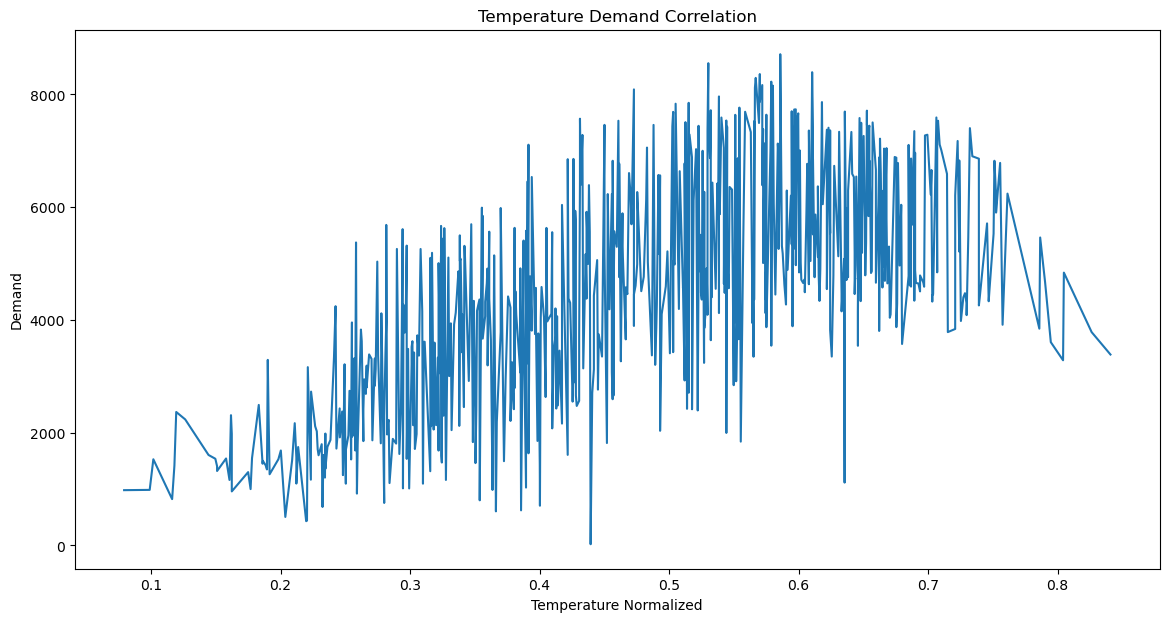

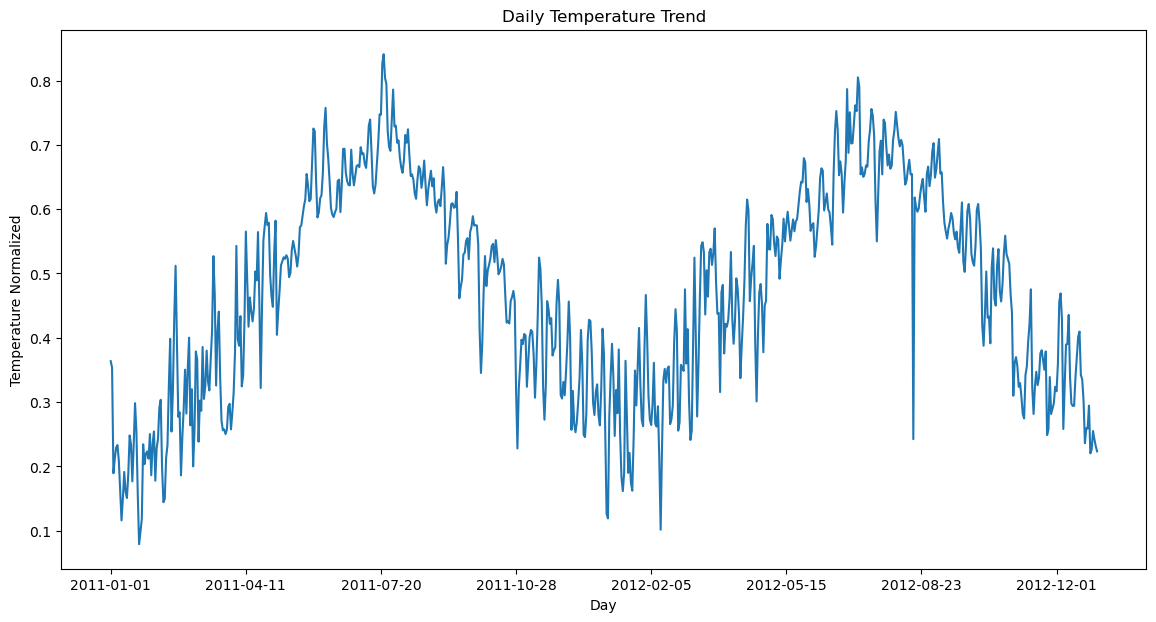

In [272]:
# Zusammenhang zwischen Temperatur und Distribution
plt.figure(figsize=(14, 7))
df.groupby('atemp')['distribution'].mean().plot()
plt.title('Temperature Demand Correlation')
plt.xlabel('Temperature Normalized')
plt.ylabel('Demand')
plt.show()

# Temperaturtrend über die Zeit
plt.figure(figsize=(14, 7))
df.groupby('date')['atemp'].mean().plot()
plt.title('Daily Temperature Trend')
plt.xlabel('Day')
plt.ylabel('Temperature Normalized')
plt.show()

Text(0, 0.5, 'Demand')

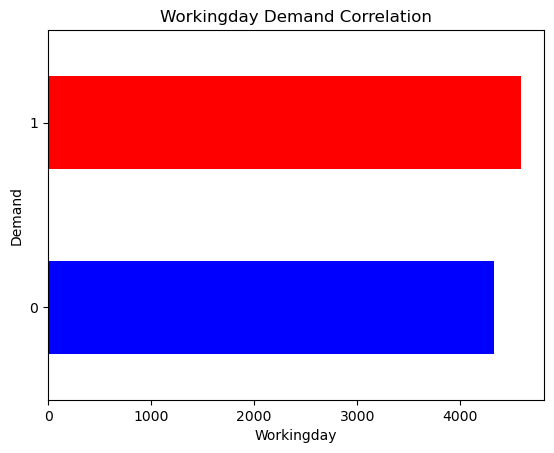

In [273]:
# Untersuchung der Arbeitstags Nachfrage Korrelation
colors = ['blue','red']
df.groupby('workingday')['distribution'].mean().sort_values(ascending=True).tail(20).plot.barh(color=colors)

plt.title('Workingday Demand Correlation')
plt.xlabel('Workingday')
plt.ylabel('Demand')

Preparieren der Daten für die Korrelationsmatrix

In [274]:
# Konvertiere 'date' in Datumsformat
df['date'] = pd.to_datetime(df['date'])

# Erstelle Dummy-Variablen für 'season'
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)


# Exkludiere 'date' von der Korrelation
df_numeric = df.drop(columns=['date'])

print(df.head())
df.dtypes

        date  year  month  holiday  weekday  workingday      temp     atemp  \
0 2011-01-01     0      1        0        6           0  0.344167  0.363625   
1 2011-01-02     0      1        0        0           0  0.363478  0.353739   
2 2011-01-03     0      1        0        1           1  0.196364  0.189405   
3 2011-01-04     0      1        0        2           1  0.200000  0.212122   
4 2011-01-05     0      1        0        3           1  0.226957  0.229270   

        hum  windspeed  casual  registered  distribution  season_Spring  \
0  0.805833   0.160446     331         654           985          False   
1  0.696087   0.248539     131         670           801          False   
2  0.437273   0.248309     120        1229          1349          False   
3  0.590435   0.160296     108        1454          1562          False   
4  0.436957   0.186900      82        1518          1600          False   

   season_Summer  season_Winter  weathersit_Few Clouds  \
0          False

date                        datetime64[ns]
year                                 int64
month                                int64
holiday                              int64
weekday                              int64
workingday                           int64
temp                               float64
atemp                              float64
hum                                float64
windspeed                          float64
casual                               int64
registered                           int64
distribution                         int64
season_Spring                         bool
season_Summer                         bool
season_Winter                         bool
weathersit_Few Clouds                 bool
weathersit_Partly Cloudy              bool
dtype: object

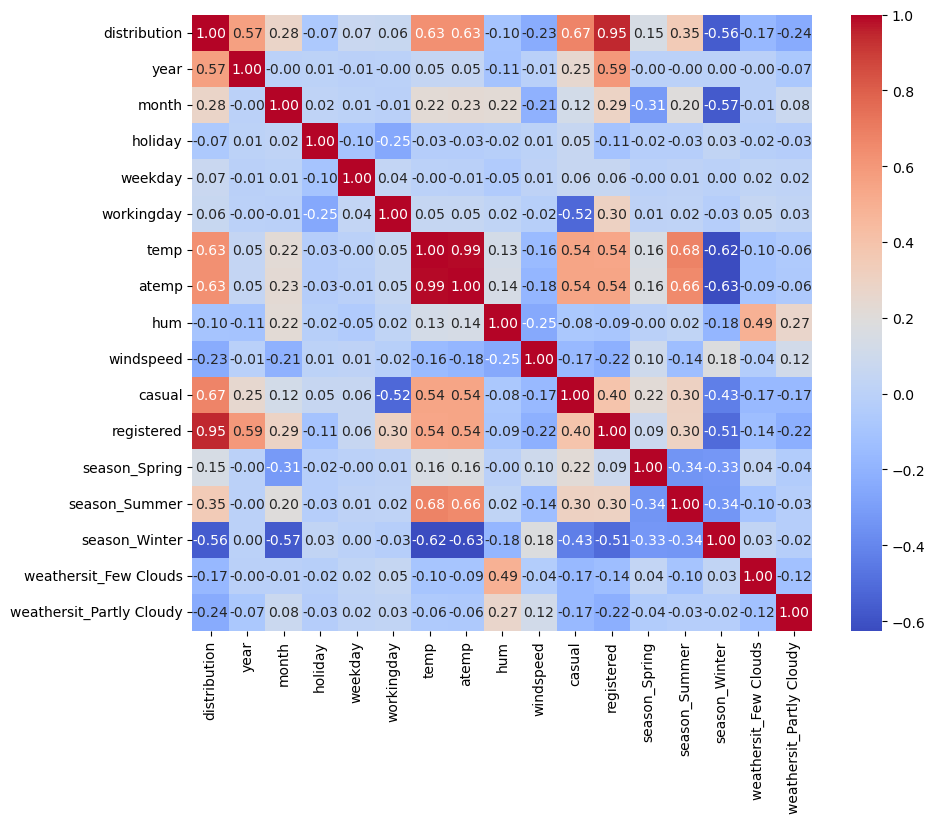

In [275]:
# Berechne Korrelationen nur für numerische Features
corr = df_numeric.corr()

# Sortieren der Matrix so, dass 'distribution' die erste Zeile/Spalte ist
cols = ['distribution'] + [col for col in corr.columns if col != 'distribution']
corr = corr.loc[cols, cols]

# Heatmap erstellen
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

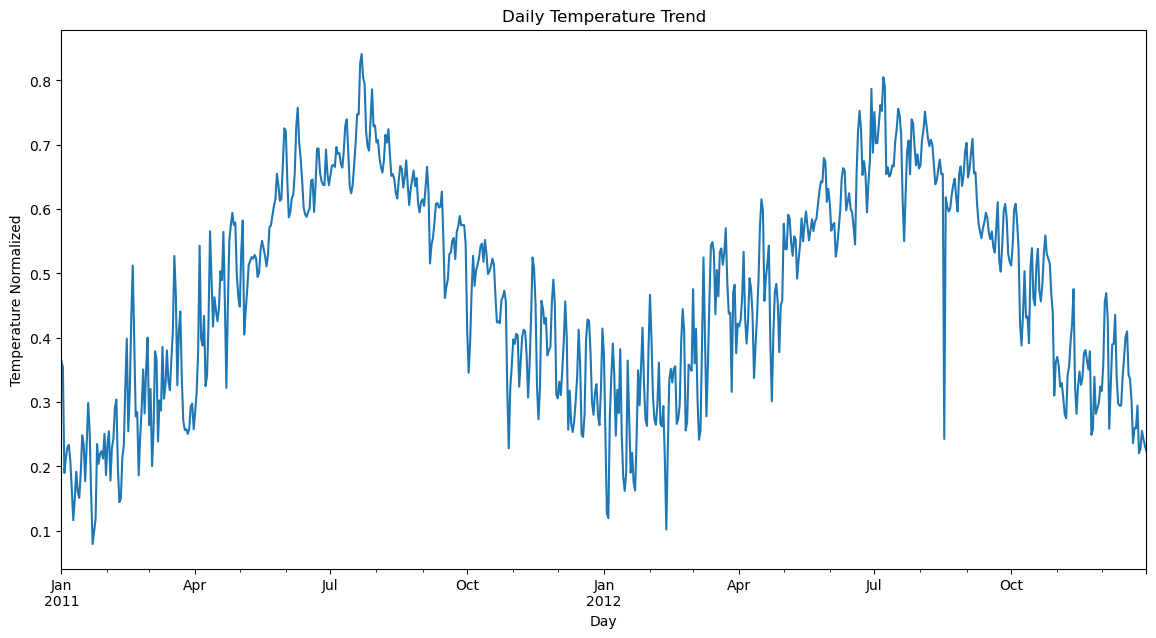

In [276]:
# Temperaturtrend über die Zeit
plt.figure(figsize=(14, 7))
df.groupby('date')['atemp'].mean().plot()
plt.title('Daily Temperature Trend')
plt.xlabel('Day')
plt.ylabel('Temperature Normalized')
plt.show()

Erste Modellierung mittels Linearen Regression

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Features ohne "casual" und Zielvariable definieren
X = df.drop(columns=['distribution', 'date', 'temp', 'casual']) # temp wird wegen Multikollinearität entfernt
y = df['distribution'] # casual + registered = target 

# Features ohne "registered" und "casual" definieren
X2 = df.drop(columns=['date', 'distribution', 'temp', 'registered', 'casual']) 
y2 = df['distribution'] # casual + registered = target

print(X2.head())
X.head()

   year  month  holiday  weekday  workingday     atemp       hum  windspeed  \
0     0      1        0        6           0  0.363625  0.805833   0.160446   
1     0      1        0        0           0  0.353739  0.696087   0.248539   
2     0      1        0        1           1  0.189405  0.437273   0.248309   
3     0      1        0        2           1  0.212122  0.590435   0.160296   
4     0      1        0        3           1  0.229270  0.436957   0.186900   

   season_Spring  season_Summer  season_Winter  weathersit_Few Clouds  \
0          False          False           True                   True   
1          False          False           True                   True   
2          False          False           True                  False   
3          False          False           True                  False   
4          False          False           True                  False   

   weathersit_Partly Cloudy  
0                     False  
1                     Fals

,year,month,holiday,weekday,workingday,atemp,hum,windspeed,registered,season_Spring,season_Summer,season_Winter,weathersit_Few Clouds,weathersit_Partly Cloudy
0,0,1,0,6,0,0.363625,0.805833,0.160446,654,False,False,True,True,False
1,0,1,0,0,0,0.353739,0.696087,0.248539,670,False,False,True,True,False
2,0,1,0,1,1,0.189405,0.437273,0.248309,1229,False,False,True,False,False
3,0,1,0,2,1,0.212122,0.590435,0.160296,1454,False,False,True,False,False
4,0,1,0,3,1,0.229270,0.436957,0.186900,1518,False,False,True,False,False


In [278]:
# Train-Test-Split
X_trainx, X_testx, y_trainx, y_testx = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
lrx_model = LinearRegression()
lrx_model.fit(X_trainx, y_trainx)

# Modellvorhersage und Bewertung
y_pred_lrx = lrx_model.predict(X_testx)

# R²-Score berechnen
r2_lrx = r2_score(y_testx, y_pred_lrx)
print(f'R²-Score: {r2_lrx}')

# MSE berechnen
mse_lrx = mean_squared_error(y_testx, y_pred_lrx)
print(f'MSE: {mse_lrx}')

R²-Score: 0.9709543206963918
MSE: 116469.75499941391


Lineare Regression Performancevergleich mit Datensatz ohne "registered" und "casual"

In [279]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Modellvorhersage und Bewertung
y_pred_lr = lr_model.predict(X_test)

print(X_train.columns)

# R²-Score berechnen
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R²-Score Lineare Regression: {r2_lr}')

# MSE berechnen
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'MSE Lineare Reggresion: {mse_lr}')

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy'],
      dtype='object')
R²-Score Lineare Regression: 0.8396027128384717
MSE Lineare Reggresion: 643174.2409258478


In [303]:
from sklearn.preprocessing import PolynomialFeatures

# Erstelle Polynom-Features (z.B. Grad 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lineare Regression trainieren mit Polynomial-Features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Vorhersagen auf den Testdaten
y_pred_poly = poly_model.predict(X_test_poly)

# R²-Score berechnen
r2_poly = r2_score(y_test, y_pred_poly)
print(f'R²-Score Polynomial Regression (Degree 3): {r2_poly}')

# MSE berechnen
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE mit Polynomial-Features (Degree 3): {mse_poly}')


R²-Score Polynomial Regression (Degree 3): -7.12454776039993e+16
MSE mit Polynomial-Features (Degree 3): 2.8568597878594635e+23


2. Modell (Random Forest) trainieren und testen

In [281]:
from sklearn.ensemble import RandomForestRegressor

# Initialisiere Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trainiere das Modell
rf_model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred_rf = rf_model.predict(X_test)

# Berechne MSE und R²-Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest R²-Score: {r2_rf}')
print(f'Random Forest MSE: {mse_rf}')


Random Forest R²-Score: 0.8841452842011666
Random Forest MSE: 464563.7729306124


Kreuzvalidierung für Lineare Regression und Random Forest

In [304]:
from sklearn.model_selection import cross_val_score

# 5-fache Kreuzvalidierung für beide Modelle
rf_cv_r2 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
lr_cv_r2 = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
poly_cv_r2 = cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='r2')
print(X_train.columns)
print(f'Random Forest CV R²-Score: {rf_cv_r2.mean()}')
print(f'Linear Regression CV R²-Score: {lr_cv_r2.mean()}')
print(f'Polynomial Regression (Degree 3) CV R²-Score: {poly_cv_r2.mean()}')


Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy'],
      dtype='object')
Random Forest CV R²-Score: 0.8488426459758289
Linear Regression CV R²-Score: 0.7985403774920485
Polynomial Regression (Degree 3) CV R²-Score: -9338720256423640.0


Hyperparameter-Optimierung für Random Forest 

In [283]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definiere den Parameterraum für Random Forest (angepasst)
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],  # Entferne 'auto' wenn es nicht unterstützt wird
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV für Random Forest
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                                       param_distributions=param_dist_rf, 
                                       n_iter=20, scoring='r2', cv=5, 
                                       random_state=42, n_jobs=-1, error_score='raise')

# Fit auf Trainingsdaten
random_search_rf.fit(X_train, y_train)

# Beste Parameter und Ergebnisse ausgeben
print("Beste Parameter für Random Forest: ", random_search_rf.best_params_)
print("Beste R²-Score für Random Forest: ", random_search_rf.best_score_)

# Vorhersagen und MSE für Random Forest
y_pred_rf2 = random_search_rf.predict(X_test)
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
print(f"Random Forest MSE: {mse_rf2}")


Beste Parameter für Random Forest:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Beste R²-Score für Random Forest:  0.8662579440066617
Random Forest MSE: 438317.55659608846


Feature-Imprortance Random Forest

                     Feature  Importance
5                      atemp    0.275638
0                       year    0.263032
10             season_Winter    0.121562
1                      month    0.110903
6                        hum    0.075797
7                  windspeed    0.051534
12  weathersit_Partly Cloudy    0.025477
3                    weekday    0.023764
9              season_Summer    0.016622
11     weathersit_Few Clouds    0.016204
4                 workingday    0.008728
8              season_Spring    0.007447
2                    holiday    0.003291


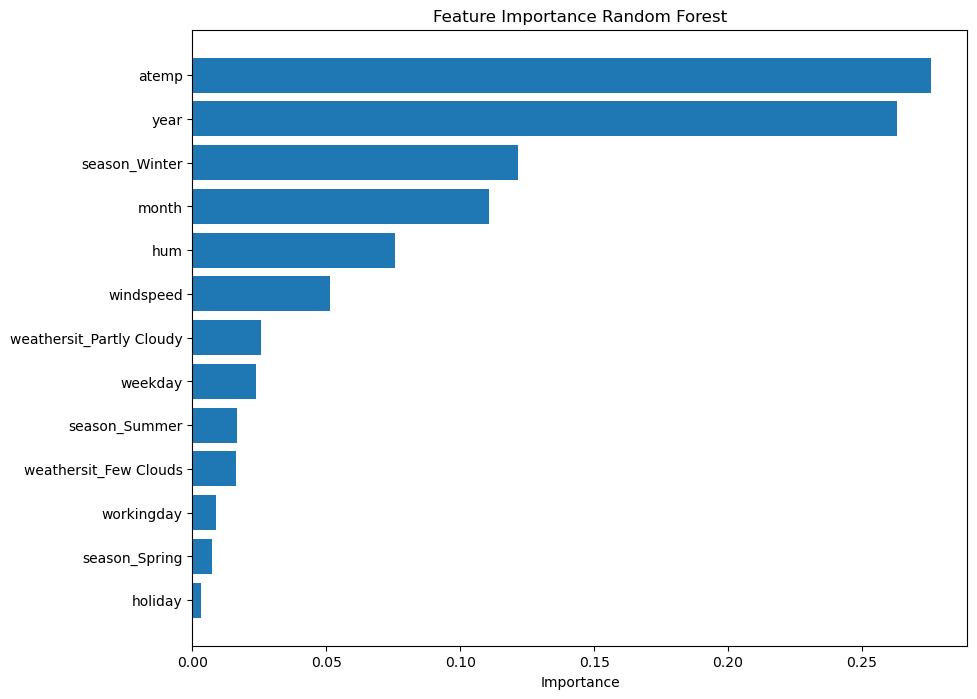

In [305]:
best_rf_model = random_search_rf.best_estimator_

# Berechne die Feature-Wichtigkeit für das beste XGBoost-Modell
importances = best_rf_model.feature_importances_

# Erstelle eine DataFrame zur besseren Übersicht
features = X_train.columns  # Annahme: Spaltennamen sind in X_train definiert
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortiere nach Wichtigkeit
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt

# Feature-Wichtigkeit plotten
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Random Forest')
plt.gca().invert_yaxis()
plt.show()


3. Modell Gradient Boosting (XGBoost)

In [285]:
from xgboost import XGBRegressor

# Definition des XGBoost Modell
xgb_model = XGBRegressor()

# Modell trainieren
xgb_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred_xgb = xgb_model.predict(X_test)

# Performance-Metriken
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R²-Score: {r2_xgb}")
print(f"XGBoost MSE: {mse_xgb}")


XGBoost R²-Score: 0.8889996435129423
XGBoost MSE: 445098.36350390327


Cross-Validation für XGBoost

In [286]:
# Cross-Validation für XGBoost
xgb_cv_r2 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

print(f"XGBoost Cross-Validation R²-Score: {xgb_cv_r2.mean()}")
print(f'Random Forest Cross-Validation R²-Score: {rf_cv_r2.mean()}')
print(f'Linear Regression Cross-Validation R²-Score: {lr_cv_r2.mean()}')

XGBoost Cross-Validation R²-Score: 0.8416986372670305
Random Forest Cross-Validation R²-Score: 0.8488426459758289
Linear Regression Cross-Validation R²-Score: 0.7985403774920485


Hyperparameter-Optimierung Random Search für XGBoost

In [287]:
from sklearn.model_selection import RandomizedSearchCV

# Definiere den Parameterraum für XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV für XGBoost mit dem bereits definierten Modell
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                       n_iter=20, scoring='r2', cv=5, random_state=42, n_jobs=-1)

# Fit auf Trainingsdaten
random_search_xgb.fit(X_train, y_train)

# Beste Parameter und Ergebnisse ausgeben
print("Beste Parameter: ", random_search_xgb.best_params_)
print("Beste R²-Score: ", random_search_xgb.best_score_)

# Vorhersagen auf den Testdaten machen
best_xgb_model = random_search_xgb.best_estimator_
y_pred_xgb2 = best_xgb_model.predict(X_test)

# MSE berechnen
mse_xgb2 = mean_squared_error(y_test, y_pred_xgb2)
print(f"XGBoost MSE nach Hyperparameter-Optimierung: {mse_xgb2}")



Beste Parameter:  {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Beste R²-Score:  0.8718885758914754
XGBoost MSE nach Hyperparameter-Optimierung: 420374.0878738537


                     Feature  Importance
0                       year    0.336765
10             season_Winter    0.266860
5                      atemp    0.133973
1                      month    0.049723
12  weathersit_Partly Cloudy    0.045568
6                        hum    0.037662
11     weathersit_Few Clouds    0.028412
9              season_Summer    0.022440
3                    weekday    0.019163
7                  windspeed    0.018428
2                    holiday    0.017447
4                 workingday    0.015455
8              season_Spring    0.008105


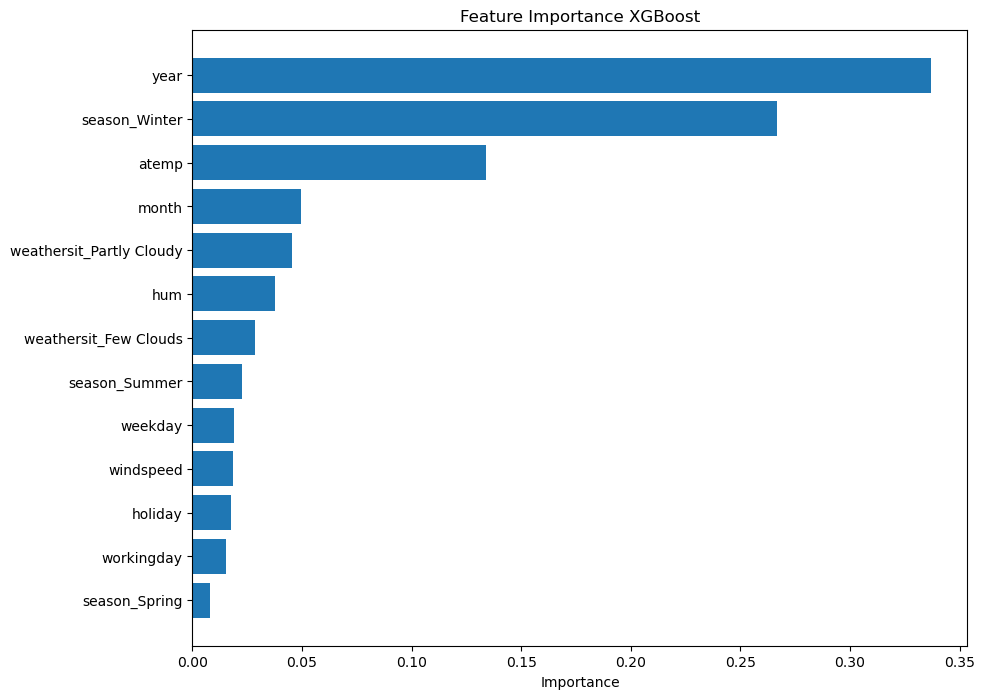

In [306]:
# Berechne die Feature-Wichtigkeit für das beste XGBoost-Modell
importances = best_xgb_model.feature_importances_

# Erstelle eine DataFrame zur besseren Übersicht
features = X_train.columns  # Annahme: Spaltennamen sind in X_train definiert
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortiere nach Wichtigkeit
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt

# Feature-Wichtigkeit plotten
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance XGBoost')
plt.gca().invert_yaxis()
plt.show()

Heatmaps der Random search

In [289]:
# Erstelle ein DataFrame aus den Random Search-Ergebnissen für Random Forest
rf_results = pd.DataFrame(random_search_rf.cv_results_)

# Pivot-Tabelle erstellen, um min_samples_split und max_features als Achsen zu verwenden und den mean_test_score zu füllen
pivot_rf = rf_results.pivot_table(values='mean_test_score', index='param_min_samples_split', 
                                  columns='param_max_features')



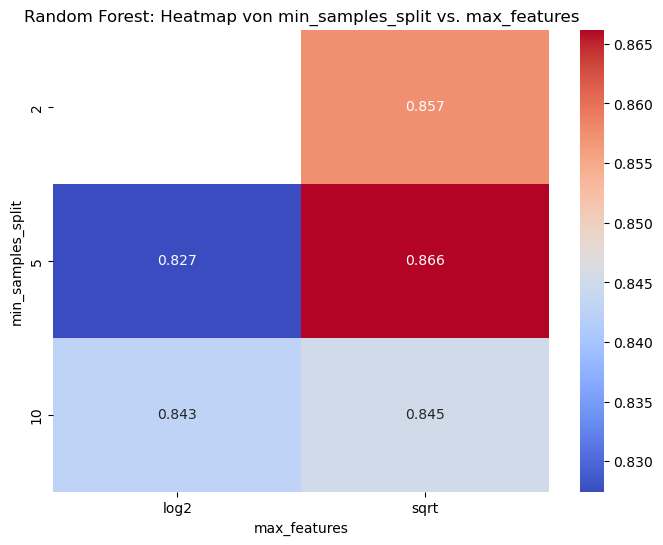

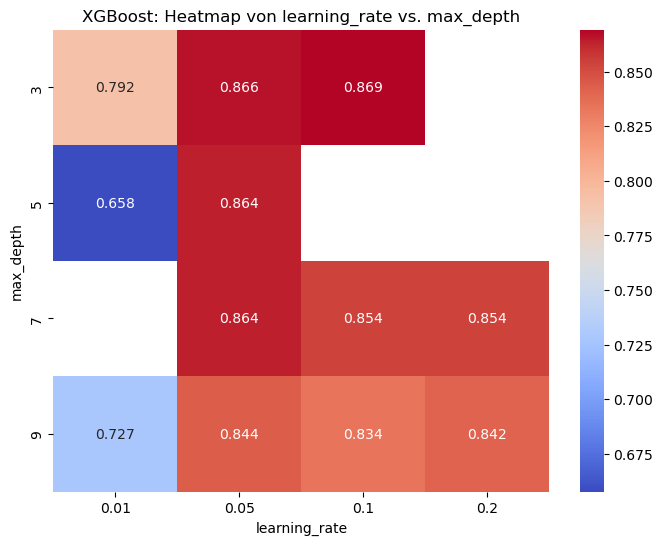

In [290]:
# Erstelle ein DataFrame aus den Random Search-Ergebnissen für XGBoost
xgb_results = pd.DataFrame(random_search_xgb.cv_results_)

# Pivot-Tabelle erstellen, um learning_rate und max_depth als Achsen zu verwenden und den mean_test_score zu füllen
pivot_xgb = xgb_results.pivot_table(values='mean_test_score', index='param_max_depth', 
                                    columns='param_learning_rate')

# Heatmap für Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_rf, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Random Forest: Heatmap von min_samples_split vs. max_features')
plt.xlabel('max_features')
plt.ylabel('min_samples_split')
plt.show()

# Heatmap für XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_xgb, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('XGBoost: Heatmap von learning_rate vs. max_depth')
plt.xlabel('learning_rate')
plt.ylabel('max_depth')
plt.show()


Zusammenfassung der Ergebnisse

XGBoost Cross-Validation R²-Score: 0.8416986372670305
Random Forest Cross-Validation R²-Score: 0.8488426459758289
Linear Regression Cross-Validation R²-Score: 0.7985403774920485

Ergebnisse nach der Hyperparameter-Optimierung
Bester R²-Score für Random Forest:  0.8662579440066617
Bester R²-Score für XGBoost:  0.8718885758914754

MSE Lineare Reggresion: 643174.2409258478
MSE Random Forest: 438317.55659608846
MSE XGBoost: 420374.0878738537


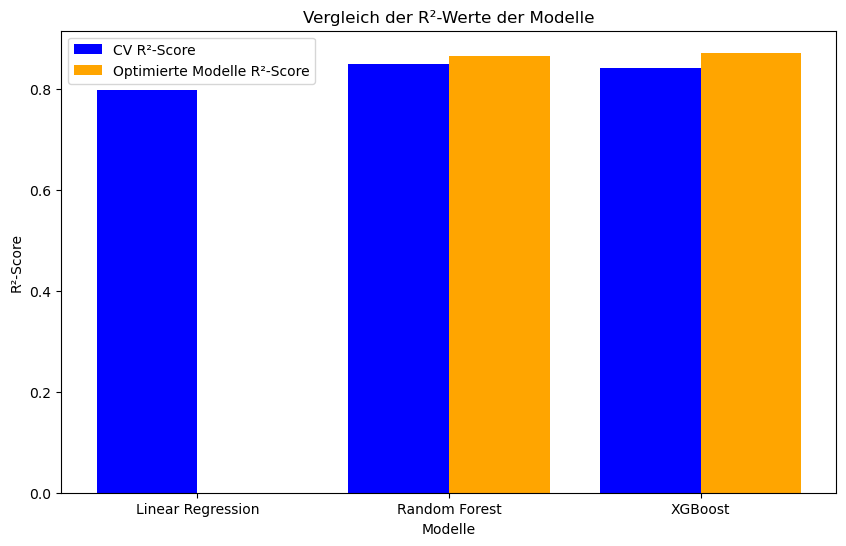

C:\Users\heppl\AppData\Local\Temp\ipykernel_33044\1872404467.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette='Reds_d')


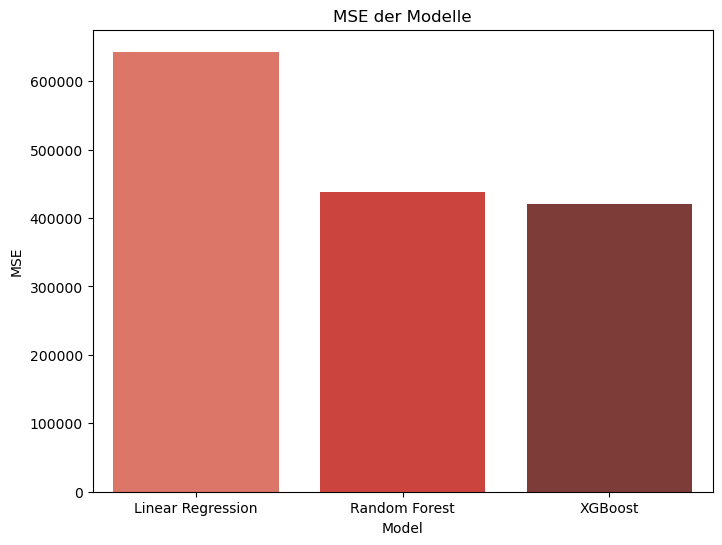

In [291]:
# Ergebnisse zusammenfassen

print(f"XGBoost Cross-Validation R²-Score: {xgb_cv_r2.mean()}")
print(f'Random Forest Cross-Validation R²-Score: {rf_cv_r2.mean()}')
print(f'Linear Regression Cross-Validation R²-Score: {lr_cv_r2.mean()}')

print('')
print('Ergebnisse nach der Hyperparameter-Optimierung')
print("Bester R²-Score für Random Forest: ", random_search_rf.best_score_)
print("Bester R²-Score für XGBoost: ", random_search_xgb.best_score_)

print('')
print(f'MSE Lineare Reggresion: {mse_lr}')
print(f'MSE Random Forest: {mse_rf2}')
print(f'MSE XGBoost: {mse_xgb2}')

model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Cross-Validation R²': [lr_cv_r2.mean(), rf_cv_r2.mean(), xgb_cv_r2.mean()],
    'Best R² (Optimized)': [None, random_search_rf.best_score_, random_search_xgb.best_score_],
    'MSE': [mse_lr, mse_rf2, mse_xgb2]
}

# DataFrame erstellen
results_df = pd.DataFrame(model_results)

# Balkendiagramm der R²-Werte
fig, ax = plt.subplots(figsize=(10, 6))

# Balken für Cross-Validation R²-Score
bar_width = 0.4
index = np.arange(len(results_df['Model']))

bars1 = ax.bar(index - bar_width/2, results_df['Cross-Validation R²'], bar_width, label='CV R²-Score', color='blue')

# Balken für optimierte R²-Score
bars2 = ax.bar(index + bar_width/2, results_df['Best R² (Optimized)'], bar_width, label='Optimierte Modelle R²-Score', color='orange')

# Achsen und Legende
ax.set_xlabel('Modelle')
ax.set_ylabel('R²-Score')
ax.set_title('Vergleich der R²-Werte der Modelle')
ax.set_xticks(index)
ax.set_xticklabels(results_df['Model'])
ax.legend()

plt.show()



# Balkendiagramm der MSE-Werte
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MSE', data=results_df, palette='Reds_d')
plt.title('MSE der Modelle')
plt.show()


Vergleich der tatsächlichen und vorhergesagten Werte

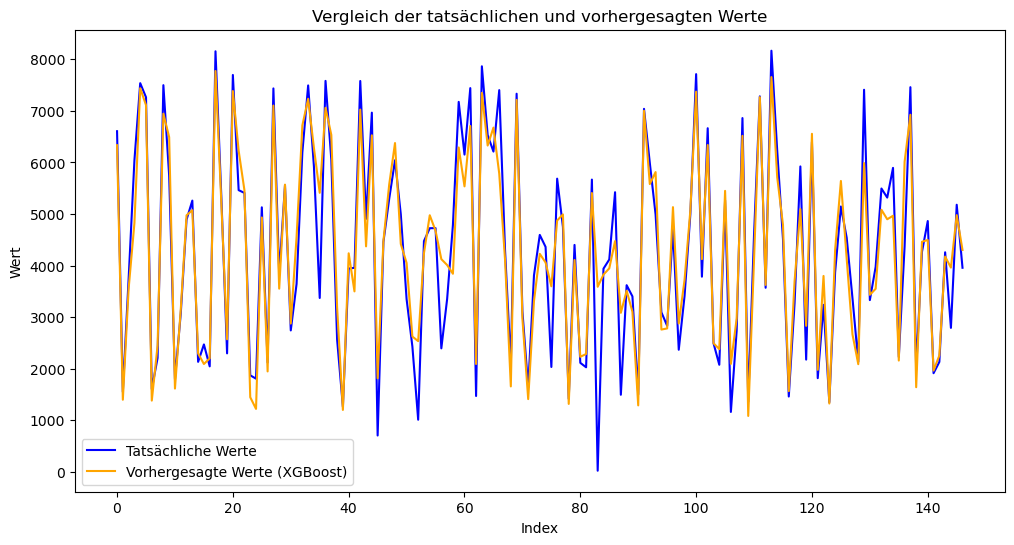

In [292]:


plt.figure(figsize=(12, 6))

# Tatsächliche Werte
plt.plot(y_test.values, label='Tatsächliche Werte', color='blue')

# Vorhergesagte Werte
plt.plot(y_pred_xgb2, label='Vorhergesagte Werte (XGBoost)', color='orange')

plt.xlabel('Index')
plt.ylabel('Wert')
plt.title('Vergleich der tatsächlichen und vorhergesagten Werte')
plt.legend()
plt.show()


In [293]:
# Erstelle ein DataFrame mit den tatsächlichen und vorhergesagten Werten
comparison_df = pd.DataFrame({'Datum': X_test['date'], 'Tatsächliche Werte': y_test, 'Vorhergesagte Werte': y_pred_xgb2})

# Sortiere das DataFrame nach dem Datum
comparison_df = comparison_df.sort_values(by='Datum')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Datum'], comparison_df['Tatsächliche Werte'], label='Tatsächliche Werte', color='blue', linewidth=2)
plt.plot(comparison_df['Datum'], comparison_df['Vorhergesagte Werte'], label='Vorhergesagte Werte', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Datum')
plt.ylabel('Werte')
plt.title('Vergleich der tatsächlichen und vorhergesagten Werte')
plt.xticks(rotation=45)
plt.legend()
plt.show()


KeyError: 'date'

Datensatz ohne zeitliche und saisonale Attribute

In [307]:
X_train.columns

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy'],
      dtype='object')

In [313]:
# Spalten für zeitliche und saisonale Features (z.B. 'date', 'month', 'season')
time_season_columns = ['year', 'month', 'season_Spring', 'season_Summer', 'season_Winter']  # Passe an deine Feature-Namen an

# Neuen Datensatz erstellen ohne diese Features
X_train2 = X_train.drop(columns=time_season_columns)
X_test2 = X_test.drop(columns=time_season_columns)

In [314]:
X_train2.columns

Index(['holiday', 'weekday', 'workingday', 'atemp', 'hum', 'windspeed',
       'weathersit_Few Clouds', 'weathersit_Partly Cloudy'],
      dtype='object')

In [316]:
# trainieren und vergleichen
lr_modelD2 = LinearRegression()
lr_modelD2.fit(X_train2, y_train)
y_pred_lrD2 = lr_modelD2.predict(X_test2)

r2_lrD2 = r2_score(y_test, y_pred_lrD2)
mse_lrD2 = mean_squared_error(y_test, y_pred_lrD2)

print(f'R²-Score ohne zeitliche/saisonale Features: {r2_lrD2}')
print(f'MSE ohne zeitliche/saisonale Features: {mse_lrD2}')

R²-Score ohne zeitliche/saisonale Features: -0.0025695006734771653
MSE ohne zeitliche/saisonale Features: 3704505.2958114957
